In [1]:
import numpy as np
import matplotlib.pyplot as plt
import qutip as qt
from scipy.optimize import curve_fit

In [2]:
import pandas as pd
df_before = pd.read_excel('data.xlsx',sheet_name = 'Before')
df_before

,wait_time (ms),filename
0,0.0,ramsey_counter_prop_rfsoc_003
1,0.5,ramsey_counter_prop_rfsoc_008
2,1.0,ramsey_counter_prop_rfsoc_009
3,3.0,ramsey_counter_prop_rfsoc_010
4,5.0,ramsey_counter_prop_rfsoc_011
5,10.0,ramsey_counter_prop_rfsoc_014
6,15.0,ramsey_counter_prop_rfsoc_013


In [3]:
def readFile(filename):
    timeTickFirst, timeTickLast, x, ion1, ion1_raw, ion1_bottom, ion1_top, \
    ion2, ion2_raw, ion2_bottom, ion2_top\
      = np.loadtxt(filename, comments='#', delimiter='\t', converters=None, 
                   skiprows=0,unpack=True, encoding='latin1')
    return x, ion1

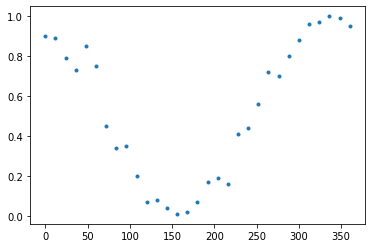

In [4]:
filename = df_before['filename'][0]
time, ramsey = readFile(filename)
plt.plot(time, ramsey, '.')

In [5]:
def func(x, A, B, theta):
    return A/2*np.cos(x/360*2*np.pi+theta)+B

In [6]:
SMALL_SIZE = 16
MEDIUM_SIZE = 20
BIGGER_SIZE = 24

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

In [34]:
def FitRamsey(xdata, ydata, guess=[1,0.5,0.1*np.pi]):
    popt, pcov = curve_fit(func, xdata, ydata, guess, sigma=np.sqrt(ydata*(1-ydata)/100)+0.0001,\
                          bounds=([0.0,0.0,-np.pi],[1.0,1.0,np.pi]))
    plt.figure(figsize=(10,6))
    plt.plot(xdata, func(xdata, *popt), 'b-', label='fit: A=%5.3f' % popt[0])
    plt.errorbar(xdata, ydata, yerr=np.sqrt(ydata*(1-ydata)/100),\
                 ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
    plt.legend()
    plt.ylim([-0.05,1.05])
    plt.xlabel('Wait time (us)')
    plt.ylabel('Population')
    print(popt)
    print('sigma_A = ', np.sqrt(np.diag(pcov)[0]))
    return popt, np.sqrt(np.diag(pcov)[0])

[0.98318402 0.50896416 0.3712571 ]
sigma_A =  0.010415512709217352


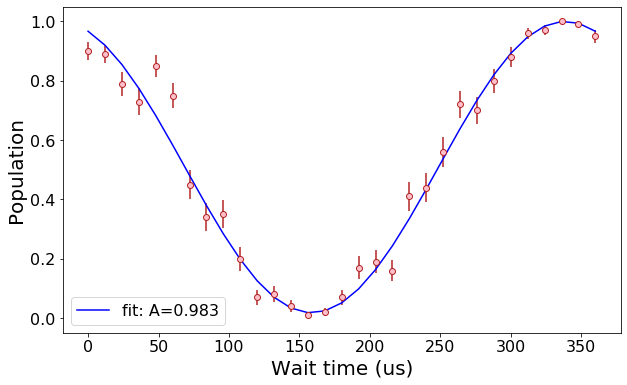

In [35]:
xdata = time
ydata = ramsey
guess = np.array([1, 0.5, 0.1*np.pi])
popt, sigma_A = FitRamsey(xdata, ydata, guess)

# Before optimizing the rep-rate lock

[0.98318402 0.50896416 0.37125711]
sigma_A =  0.01041551277862153
[0.5985346  0.45945571 0.51352828]
sigma_A =  0.043075279042613115
[0.58476215 0.47228743 0.69089717]
sigma_A =  0.03901822634728083
[0.42175609 0.5179013  0.60333582]
sigma_A =  0.05112754463726448
[0.48212645 0.52628994 0.67131022]
sigma_A =  0.057836699775034646
[0.24109571 0.54505005 0.53499263]
sigma_A =  0.06524322070657773
[0.3893759  0.55005864 0.39179066]
sigma_A =  0.06059083568237874


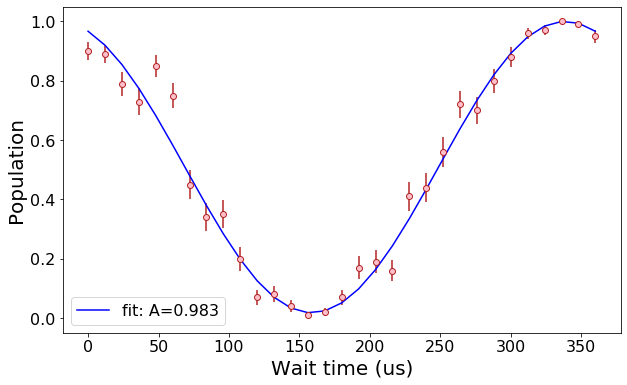

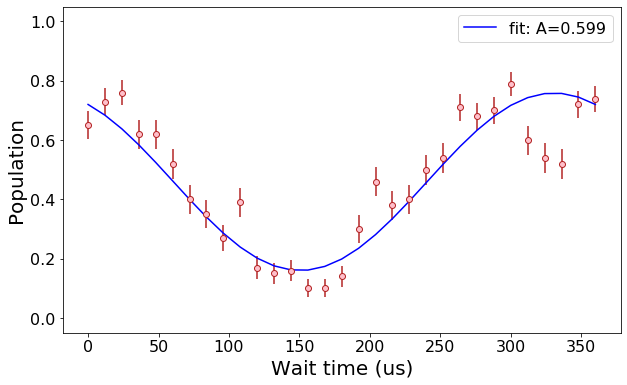

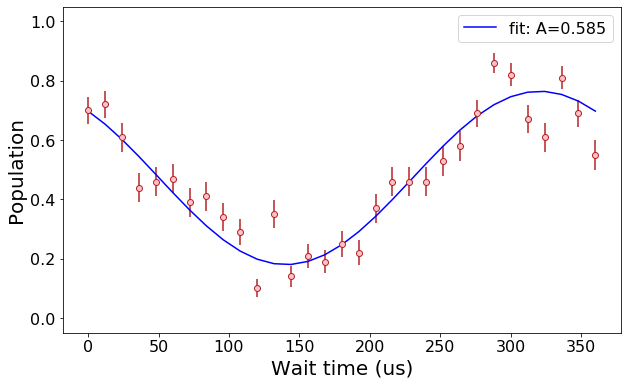

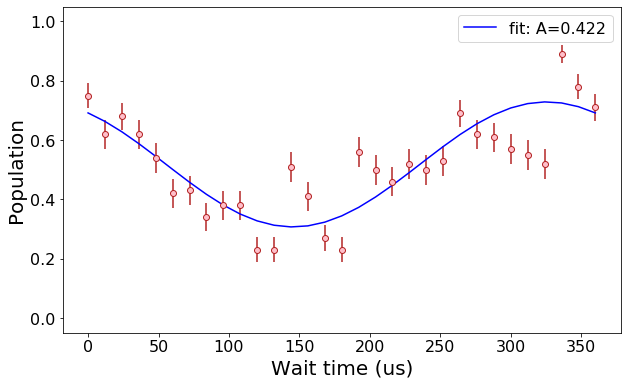

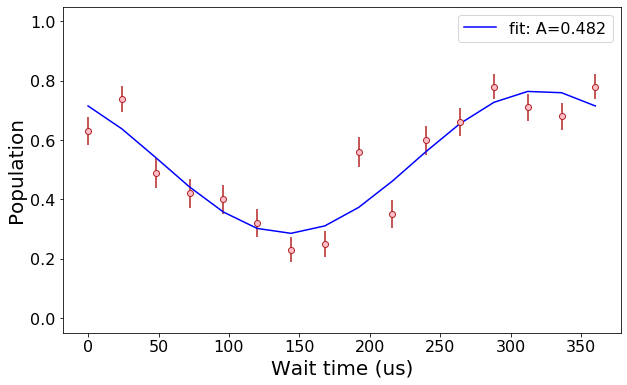

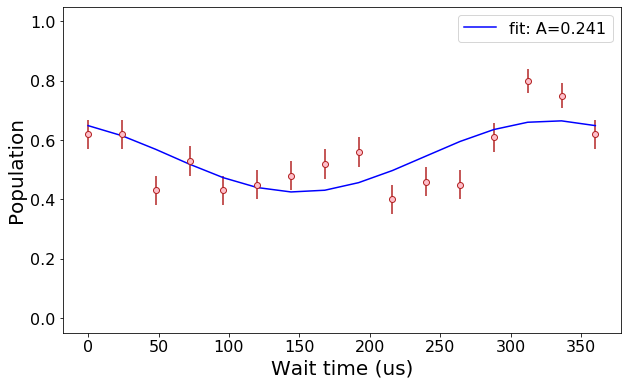

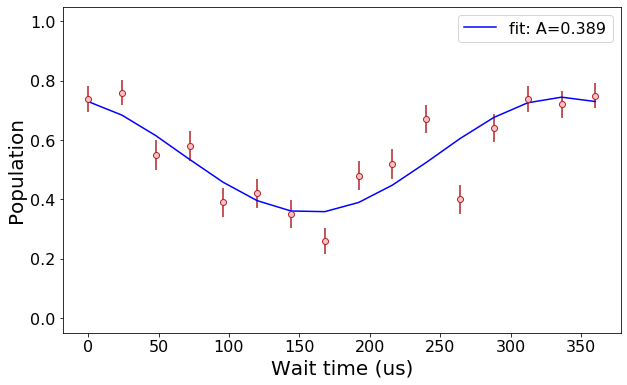

In [29]:
As=[]
sigma_As=[]
wait_time=[]
for i in range(len(df_before)):
    wait_t = df_before['wait_time (ms)'][i]
    filename = df_before['filename'][i]
    xdata, ydata = readFile(filename)
    guess = np.array([1, 0.5, 0.1*np.pi])
    popt, sigma_A = FitRamsey(xdata, ydata, guess)
    As.append(popt[0])
    sigma_As.append(sigma_A)
    wait_time.append(wait_t)


Text(0, 0.5, 'Contrast')

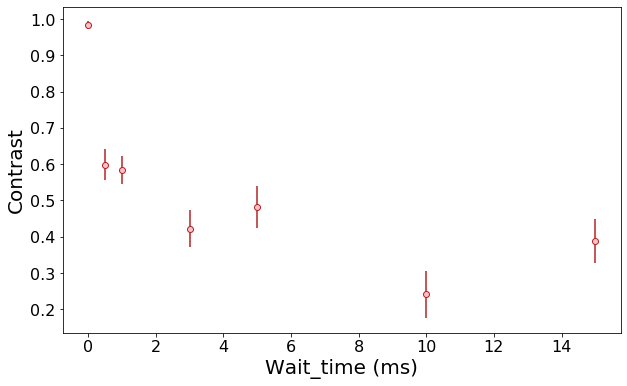

In [30]:
plt.figure(figsize = (10,6))
plt.errorbar(wait_time, As, yerr=sigma_As,ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
plt.xlabel('Wait_time (ms)')
plt.ylabel('Contrast')

In [36]:
df_after = pd.read_excel('data.xlsx',sheet_name = 'After')
df_after

,wait_time (ms),filename
0,0,ramsey_counter_prop_rfsoc_018
1,10,ramsey_counter_prop_rfsoc_019
2,15,ramsey_counter_prop_rfsoc_020
3,30,ramsey_counter_prop_rfsoc_021
4,50,ramsey_counter_prop_rfsoc_022
5,75,ramsey_counter_prop_rfsoc_024
6,100,ramsey_counter_prop_rfsoc_023
7,150,ramsey_counter_prop_rfsoc_028
8,200,ramsey_counter_prop_rfsoc_029


[0.85260242 0.50574923 0.05996179]
sigma_A =  0.028308633719140934
[ 0.55965969  0.4806387  -0.49257748]
sigma_A =  0.025985119790676615
[ 0.61499713  0.50328067 -1.01222037]
sigma_A =  0.02469465661736931
[ 0.47568494  0.47211651 -2.2611906 ]
sigma_A =  0.03352090462417658
[0.39808605 0.48429794 2.26408992]
sigma_A =  0.03145131274319107
[0.22923609 0.38978332 0.48947035]
sigma_A =  0.037366159239883755
[ 0.22107666  0.40338524 -2.12787085]
sigma_A =  0.037679855399185516
[0.12884043 0.32499759 0.91284819]
sigma_A =  0.038016200068802734
[0.26439886 0.24079794 1.6303416 ]
sigma_A =  0.035026066195858616


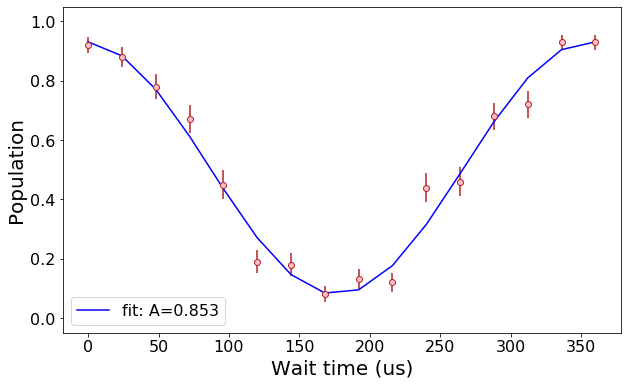

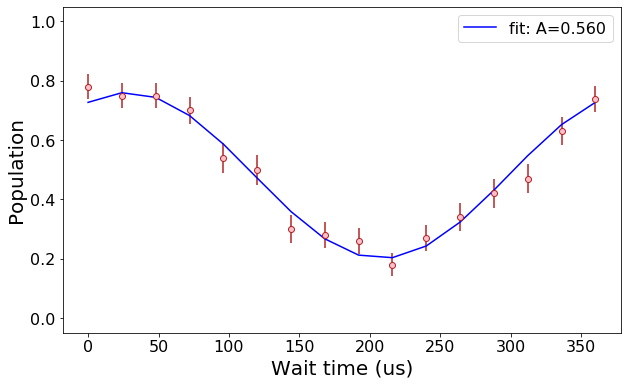

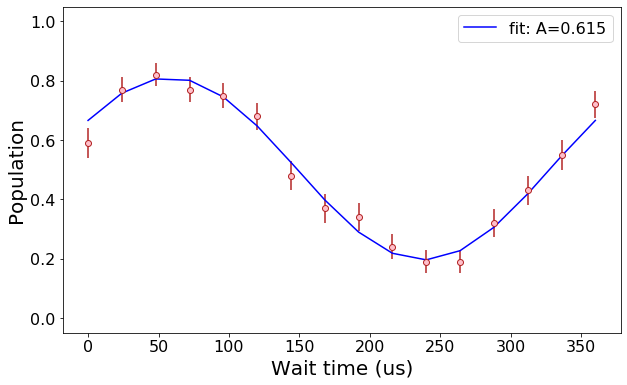

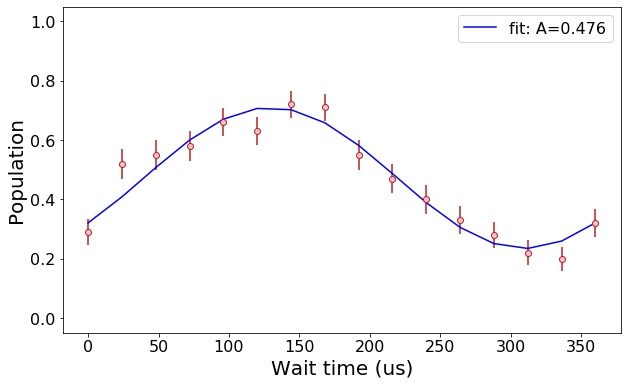

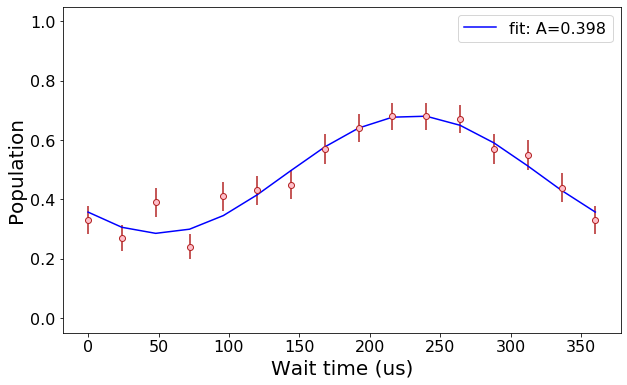

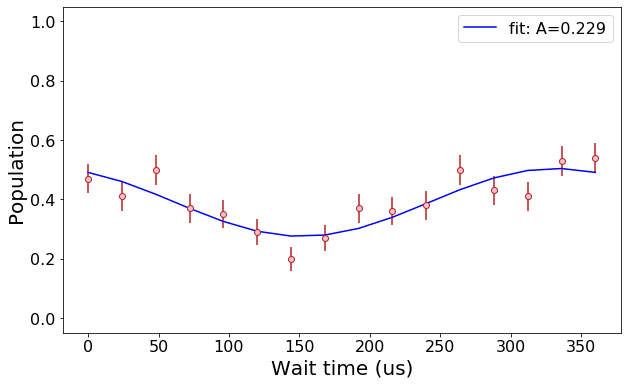

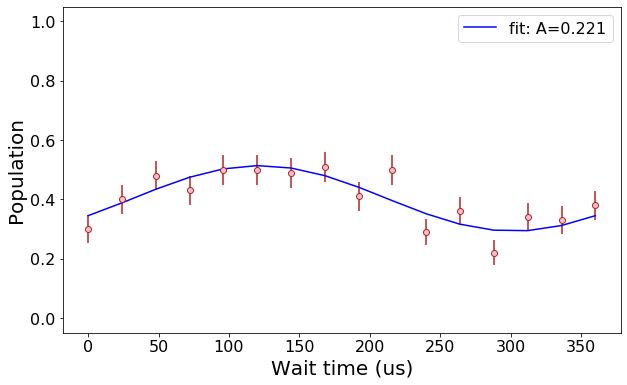

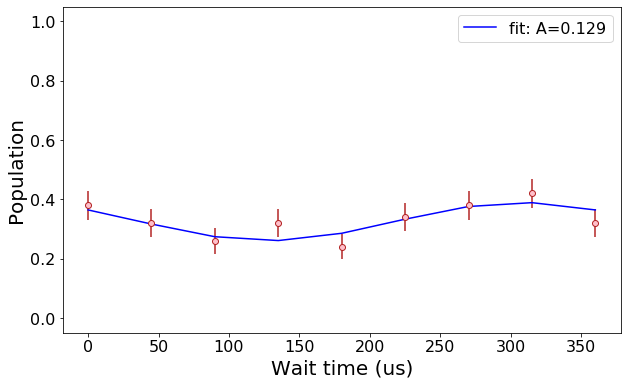

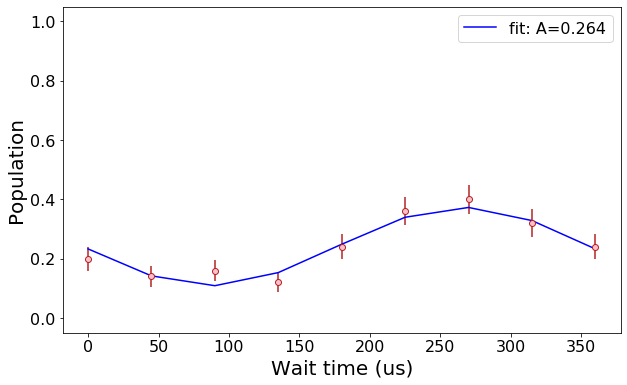

In [37]:
As_2=[]
sigma_As_2=[]
wait_time_2=[]
for i in range(len(df_after)):
    wait_t = df_after['wait_time (ms)'][i]
    filename = df_after['filename'][i]
    xdata, ydata = readFile(filename)
    guess = np.array([1, 0.5, 0.1*np.pi])
    popt, sigma_A = FitRamsey(xdata, ydata, guess)
    As_2.append(popt[0])
    sigma_As_2.append(sigma_A)
    wait_time_2.append(wait_t)

Text(0, 0.5, 'Contrast')

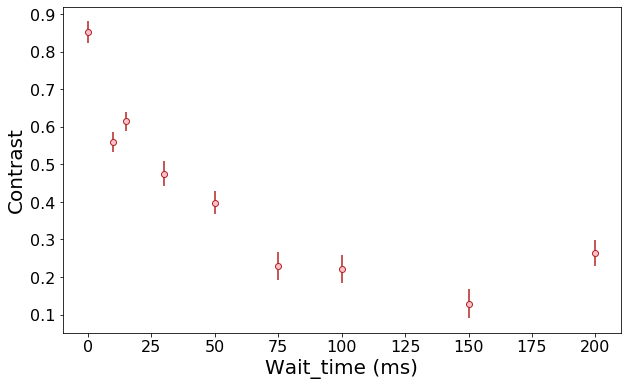

In [38]:
plt.figure(figsize = (10,6))
plt.errorbar(wait_time_2, As_2, yerr=sigma_As_2,ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
plt.xlabel('Wait_time (ms)')
plt.ylabel('Contrast')

In [78]:
def func_decay(x,A,tau):
    return 1*np.exp(-1.0*(x/tau))
def Fit_decay(xdata, ydata, yerr, guess=[1,50]):
    popt, pcov = curve_fit(func_decay, xdata, ydata, guess, sigma=yerr)
    plt.figure(figsize=(10,6))
    plt.plot(xdata, func_decay(xdata, *popt), 'b-', label='fit: tau = %5.3f' % popt[1])
    plt.errorbar(xdata, ydata, yerr,\
                 ls='', marker='o',mec='firebrick', ecolor='firebrick',mfc='pink')
    plt.legend()
    plt.ylim([-0.05,1.05])
    plt.xlabel('Wait time (us)')
    plt.ylabel('Contrast')
    print(popt)
    print('sigma_tau = ', np.sqrt(np.diag(pcov)[1]))
    return popt, np.sqrt(np.diag(pcov)[1])

[1.         3.26822111]
sigma_tau =  inf
[ 1.         39.63557468]
sigma_tau =  inf


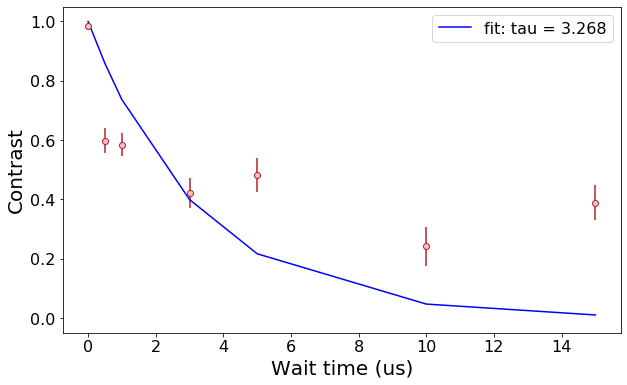

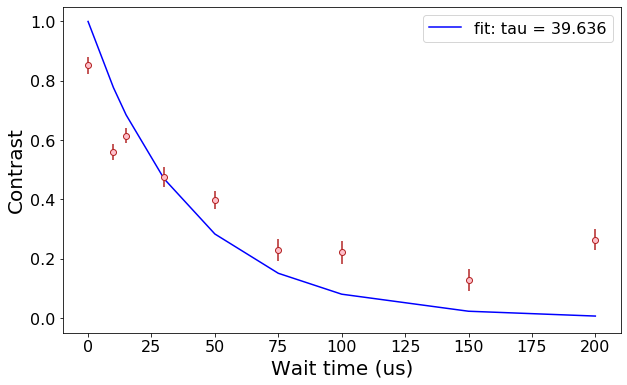

In [79]:
popt1, sigma_A1 = Fit_decay(wait_time, As, sigma_As)
popt2, sigma_A2 = Fit_decay(wait_time_2, As_2, sigma_As_2)

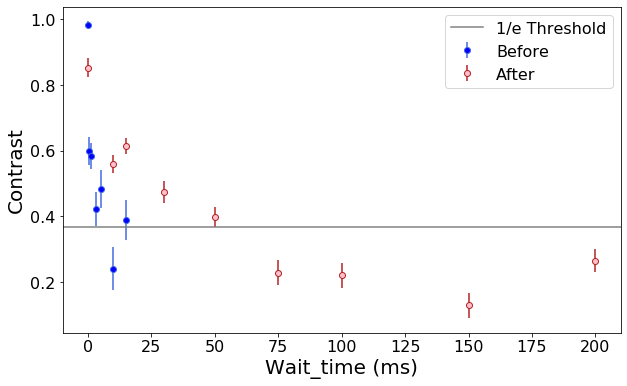

In [77]:
plt.figure(figsize = (10,6))
plt.errorbar(wait_time, As, yerr=sigma_As,ls='', marker='o',mec='royalblue', 
             ecolor='royalblue',mfc='blue', label = 'Before')
# plt.plot(wait_time, func_decay(wait_time, *popt1), 'b-')
plt.errorbar(wait_time_2, As_2, yerr=sigma_As_2,ls='', marker='o',mec='firebrick', 
             ecolor='firebrick',mfc='pink', label = 'After')
# plt.plot(wait_time_2, func_decay(wait_time_2, *popt2), 'r-')
plt.axhline(y = 1/np.exp(1),color = 'grey', label = '1/e Threshold')
plt.xlabel('Wait_time (ms)')
plt.ylabel('Contrast')
plt.legend()